<a href="https://colab.research.google.com/github/raynardj/python4ml/blob/master/experiments/ADAIN_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdaIN
> Example on AdaIN

$AdaIN(x,y) = \sigma(y)(\frac{x-\mu(x)}{\sigma(x)})+\mu(y)$

In [0]:
from PIL import Image

In [0]:
img1 = Image.open("img01.jpg").resize((400,300))
img2 = Image.open("img02.jpg").resize((400,300))

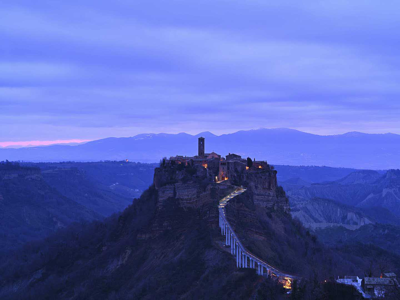

In [7]:
img1

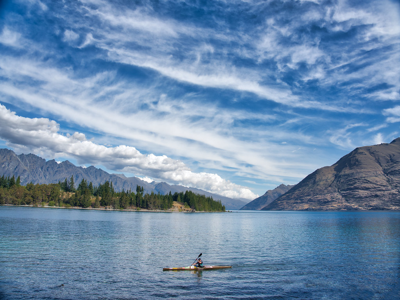

In [8]:
img2

In [0]:
import numpy as np

In [0]:
a1 = np.array(img1)
a2 = np.array(img2)

In [69]:
a1

array([[[119, 143, 249],
        [119, 143, 249],
        [119, 143, 249],
        ...,
        [141, 169, 253],
        [141, 169, 253],
        [141, 169, 253]],

       [[122, 146, 252],
        [122, 146, 252],
        [119, 143, 249],
        ...,
        [141, 169, 253],
        [141, 169, 253],
        [141, 169, 253]],

       [[123, 147, 253],
        [123, 147, 253],
        [120, 144, 250],
        ...,
        [140, 168, 252],
        [140, 168, 252],
        [140, 168, 252]],

       ...,

       [[ 25,  35,  74],
        [ 23,  32,  72],
        [ 22,  32,  71],
        ...,
        [ 18,  22,  47],
        [ 23,  27,  52],
        [ 22,  26,  51]],

       [[ 23,  33,  68],
        [ 23,  33,  68],
        [ 23,  33,  68],
        ...,
        [ 25,  29,  54],
        [ 19,  23,  48],
        [ 24,  28,  53]],

       [[ 23,  34,  67],
        [ 23,  34,  67],
        [ 23,  34,  67],
        ...,
        [ 30,  34,  59],
        [ 22,  26,  51],
        [ 19,  23,  48]]

In [70]:
a1.shape,a2.shape

((300, 400, 3), (300, 400, 3))

In [0]:
from matplotlib import pyplot as plt

### Image 1 distribution

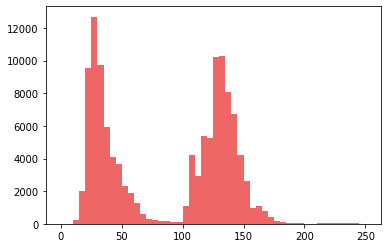

In [72]:
_=plt.hist(a1.reshape(-1,3)[:,0],bins=range(0,255,5),color="#EE6666")

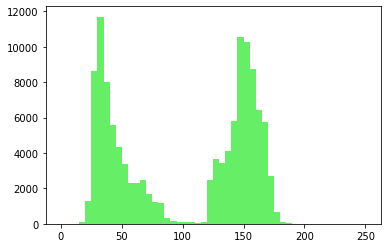

In [73]:
_=plt.hist(a1.reshape(-1,3)[:,1],bins=range(0,255,5),color="#66EE66")

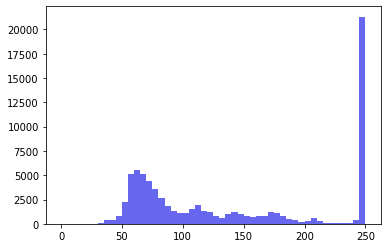

In [74]:
_=plt.hist(a1.reshape(-1,3)[:,2],bins=range(0,255,5),color="#6666EE")

### Image 2 color distribution

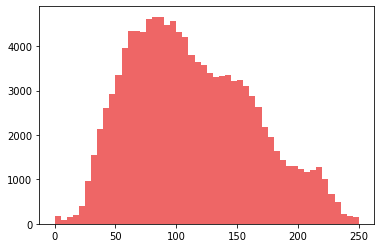

In [75]:
_=plt.hist(a2.reshape(-1,3)[:,0],bins=range(0,255,5),color="#EE6666")

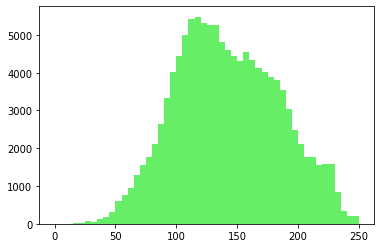

In [76]:
_=plt.hist(a2.reshape(-1,3)[:,1],bins=range(0,255,5),color="#66EE66")

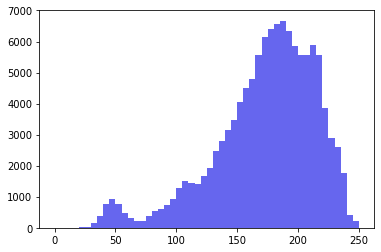

In [77]:
_=plt.hist(a2.reshape(-1,3)[:,2],bins=range(0,255,5),color="#6666EE")

### Mean and std for each color channel

In [0]:
def calc_mean_std(x):
    return x.mean(0).mean(0)[None,None,:],np.array(list(x[...,v].std() for v in range(3)))[None,None,:]

In [0]:
a1_mu, a1_sigma = calc_mean_std(a1)
a2_mu, a2_sigma = calc_mean_std(a2)

### Mean and std for iamge 1
Please compare the values to the color distribution above 

In [90]:
a1_mu

array([[[ 87.24053333, 100.88355833, 180.17075833]]])

In [91]:
a1_sigma

array([[[50.73335994, 55.11266143, 82.21159144]]])

### Mean and std for image 2

In [92]:
a2_mu

array([[[112.398125  , 141.59923333, 172.72276667]]])

In [93]:
a2_sigma

array([[[50.37244738, 42.43501722, 42.07578609]]])

Normalize each color channel for image1, according to 1's mean and std

In [0]:
a1_normed = (a1-a1_mu)/a1_sigma

Reconstruct the distribution with image2's mean and std: **transfer to image2 style**

In [0]:
a1_trans = (a1_normed* a2_sigma )+a2_mu

clean up the extrapolated value

In [0]:
a1_trans = np.clip(a1_trans,a_min=0,a_max=255.)

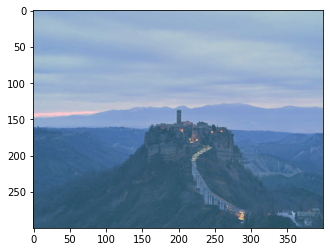

In [104]:
plt.imshow(a1_trans/255)